In [1]:
#Import required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
# Read data from web
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# See no. of rows and columns
df.shape

(400, 4)

In [6]:
#select variables
df[['admit', 'gre']]
#filter data
df.query('gpa >= 3')

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
5,1,760,3.00,2
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2
10,0,800,4.00,4
11,0,440,3.22,1


In [7]:
#structure and data type for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [8]:
#Summarize dataframe
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [9]:
#check isnull value(missing)
pd.isnull(df.gpa)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
Name: gpa, Length: 400, dtype: bool

In [10]:
# rename rank column
df = df.rename(columns={'rank': 'position'}) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7C5248D30>,
      dtype=object)

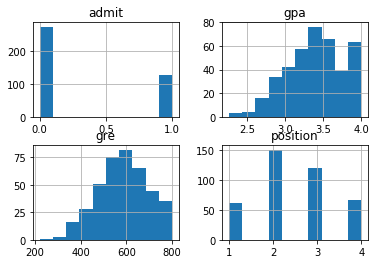

In [11]:
# plot all of the columns
df.hist()

In [12]:
# frequency distribution of categorical variable
df.position.value_counts(ascending=True)

1     61
4     67
3    121
2    151
Name: position, dtype: int64

In [15]:
# crosstab for row,column
pd.crosstab(df['admit'], df['position'])

position,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [16]:
#checking missing data by looping

for i in list(df.columns) :
    k = sum(pd.isnull(df[i]))
    print(i, k)

admit 0
gre 0
gpa 0
position 0


logistic regression
logistic regression model returns probability of target variable where is categorical variable

Logistic Regression is a special type of regression where target variable is categorical in nature and independent variables be discrete or continuous. In this post, we will demonstrate only binary logistic regression which takes only binary values in target variable. Unlike linear regression, logistic regression model returns probability of target variable.It assumes binomial distribution of dependent variable. In other words, it belongs to binomial family.

In python, we can write R-style model formula y ~ x1 + x2 + x3 using  patsy and statsmodels libraries. In the formula, we need to define variable 'position' as a categorical variable by mentioning it inside capital C(). You can also define reference category using reference= option.

In [17]:
#logistic regression
#Reference Category
from patsy import dmatrices, Treatment
y, X = dmatrices('admit ~ gre + gpa + C(position, Treatment(reference=4))', df, return_type = 'dataframe')


In [21]:
#Split Data into two parts

#80% of data goes to training dataset which is used for building model and 20% goes to test dataset which would be used for validating the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#Fit Logit model
logit = sm.Logit(y_train, X_train)
result = logit.fit()



Optimization terminated successfully.
         Current function value: 0.571367
         Iterations 6


In [24]:
#Summary of Logistic regression model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:                 0.08716
Time:                        23:28:55   Log-Likelihood:                -182.84
converged:                       True   LL-Null:                       -200.30
                                        LLR p-value:                 1.564e-06
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -5.6170      1.284     -4.376      0.000      -8.133      -3.101
C(position, Treatment(reference=4))[T.1]     1.8081      0.487      3.713      0.000       0.854       2.762
C(position, Treatment(reference=4))[T.2]     1.1054      0.432      2.557      0.011       0.258       1.952
C(position, Treatment(reference=4))[T.3]     0.3775      0.463      0.815      0.415      -0.530       1.285
gre                                          0.0018      0.001      1.456      0.145      -0.001       0.004
gpa                                          0.8518      0.368      2.312      0.021       0.130       1.574
============================================================================================================
"""

In [25]:
# formula of coefficient of each variables
result.params

Intercept                                  -5.616988
C(position, Treatment(reference=4))[T.1]    1.808055
C(position, Treatment(reference=4))[T.2]    1.105371
C(position, Treatment(reference=4))[T.3]    0.377535
gre                                         0.001788
gpa                                         0.851847
dtype: float64

In [27]:
#Confusion Matrix
result.pred_table()


array([[202.,  16.],
       [ 75.,  27.]])

In [ ]:
#Odd ratio is exponential value of parameter estimates.
#Odd Ratio
np.exp(result.params)

In [32]:
#prediction on test data
y_pred = result.predict(X_test)

In [33]:
#Calculate Area under Curve (ROC)
# AUC on test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
auc(false_positive_rate, true_positive_rate)

NameError: name 'roc_curve' is not defined

In [34]:
#Calculate Accuracy Score
accuracy_score([ 1 if p > 0.5 else 0 for p in y_pred ], y_test)

NameError: name 'accuracy_score' is not defined

Decision Tree Model

Decision trees can have a target variable continuous or categorical. When it is continuous, it is called regression tree. And when it is categorical, it is called classification tree. It selects a variable at each step that best splits the set of values. There are several algorithms to find best split. Some of them are Gini, Entropy, C4.5, Chi-Square. There are several advantages of decision tree. It is simple to use and easy to understand. It requires a very few data preparation steps. It can handle mixed data - both categorical and continuous variables. In terms of speed, it is a very fast algorithm.

In [35]:
#Decision Tree Model
#Drop Intercept from predictors for tree algorithms
X_train = X_train.drop(['Intercept'], axis = 1)
X_test = X_test.drop(['Intercept'], axis = 1)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=7)

#Fit the model:
model_tree.fit(X_train,y_train)

#Make predictions on test set
predictions_tree = model_tree.predict_proba(X_test)
  
#AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_tree[:,1])
auc(false_positive_rate, true_positive_rate)

NameError: name 'roc_curve' is not defined

Random Forest Model

Decision Tree has limitation of overfitting which implies it does not generalize pattern. It is very sensitive to a small change in training data. To overcome this problem, random forest comes into picture. It grows a large number of trees on randomised data. It selects random number of variables to grow each tree. It is more robust algorithm than decision tree. It is one of the most popular machine learning algorithm. It is commonly used in data science competitions. It is always ranked in top 5 algorithms. It has become a part of every data science toolkit.

In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=7)

#Fit the model:
target = y_train['admit']
model_rf.fit(X_train,target)

#Make predictions on test set
predictions_rf = model_rf.predict_proba(X_test)

#AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_rf[:,1])
auc(false_positive_rate, true_positive_rate)

#Variable Importance
importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)
importances.plot.bar()

NameError: name 'roc_curve' is not defined

In [ ]:
Grid Search - Hyper Parameters Tuning

The sklearn library makes hyper-parameters tuning very easy. It is a strategy to select the best parameters for an algorithm. In scikit-learn they are passed as arguments to the constructor of the estimator classes. For example, max_features in randomforest. alpha for lasso.


In [38]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
target = y_train['admit']

param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 3, 4]
}

CV_rfc = GridSearchCV(estimator=rf , param_grid=param_grid, cv= 5, scoring='roc_auc')
CV_rfc.fit(X_train,target)

#Parameters with Scores
CV_rfc.grid_scores_

#Best Parameters
CV_rfc.best_params_
CV_rfc.best_estimator_

#Make predictions on test set
predictions_rf = CV_rfc.predict_proba(X_test)

#AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_rf[:,1])
auc(false_positive_rate, true_positive_rate)

C:\Users\cheungpakyinpatrick\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [39]:
# Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
target = y['admit']
prediction_logit = cross_val_predict(LogisticRegression(), X, target, cv=10, method='predict_proba')
#AUC
cross_val_score(LogisticRegression(fit_intercept = False), X, target, cv=10, scoring='roc_auc')

C:\Users\cheungpakyinpatrick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cheungpakyinpatrick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cheungpakyinpatrick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cheungpakyinpatrick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cheungpakyinpatrick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

array([0.81318681, 0.59340659, 0.75274725, 0.80911681, 0.73076923,
       0.63247863, 0.62108262, 0.42901235, 0.67283951, 0.57098765])

sklearn requires all categorical variables in numeric form. Hence, we need to convert all character/categorical variables to be numericm

In [ ]:
from sklearn.preprocessing import LabelEncoder
def ConverttoNumeric(df):
    cols = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for i in cols:
        try:
            df[i] = le.fit_transform(df[i])
        except:
            print('Error in Variable :'+i)
    return df

ConverttoNumeric(df)

In [40]:
productcode_dummy = pd.get_dummies(df["productcode"])
df2 = pd.concat([df, productcode_dummy], axis=1)

KeyError: 'productcode'